# I was just curious what it looks like


In [16]:
from pylab import *
import matplotlib as mpl
import seaborn as sns
import calc11
import numpy as np
from scipy import constants
import fdmt # you'll need to have ../python in  you PYTHONPATH
from graphviz import Digraph
from collections import OrderedDict


%matplotlib inline

In [24]:
import importlib
bw = 0.288 # bandwidth GHz
Nd = 1024 # number of DM trials
Nchan= 128
Nt = 256 # time block size
f1 = 0.976
chanbw = 1e-3
freqs = f1 + np.arange(Nchan)*chanbw
lambdas = constants.c / (freqs*1e9)
nbytes = 2
importlib.reload(fdmt)
thefdmt = fdmt.Fdmt(f1, chanbw, Nchan, Nd, Nt)


In [31]:
din = np.random.randn(Nchan, Nt)
#din = np.ones((Nchan, Nt))
dout = thefdmt(din)

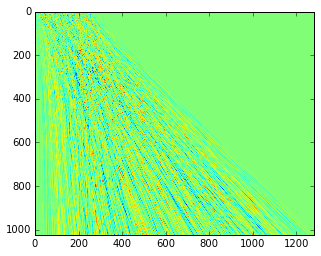

In [32]:
imshow(dout)

3.552713678800501e-15


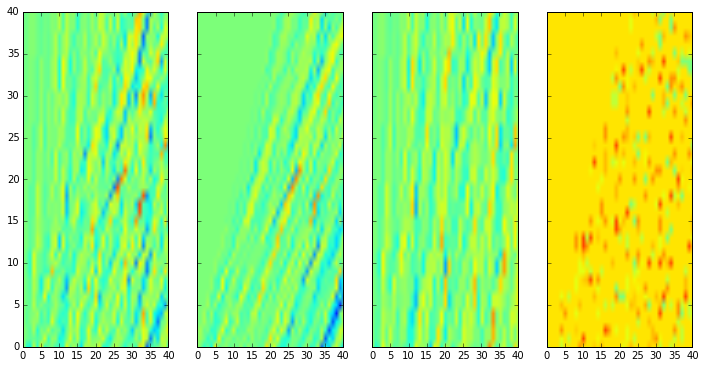

In [39]:
din1 = din.copy()
din2 = din.copy()

din1[0:Nchan/2,:] = 0
din2[ Nchan/2:, :] = 0

dout1 = thefdmt(din1)
dout2 = thefdmt(din2)

fig, ax = subplots(1,4, figsize=(12,6), sharex=True, sharey=True)
ax[0].imshow(dout, origin='lower', aspect='auto')
ax[1].imshow(dout1,origin='lower', aspect='auto')
ax[2].imshow(dout2,origin='lower', aspect='auto')
ax[3].imshow(dout - dout1- dout2,origin='lower', aspect='auto')
ax[3].set_ylim(0, 40)
ax[3].set_xlim(0, 40)

print((dout - dout1- dout2).max())

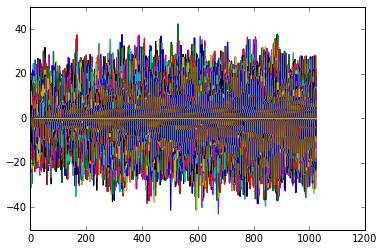